<a href="https://colab.research.google.com/github/makdatascience/Appliance_Energy_Prediction/blob/main/Proj_Super_ML_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<b><u> Importing Data


In [252]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone projects/Capstone Project_2_Supervised_ML_Reg/data_application_energy.csv")

<b><u> EDA

In [253]:
print("Shape of Dataframe: ",df.shape)
print("Total Columns: ", len(df.columns))


Shape of Dataframe:  (19735, 29)
Total Columns:  29


In [254]:
# df.head()

In [255]:
print("Data recorded is between ", df.date.min()," and ", df.date.max())
print("Total Energy usage by the appliances in this period:", df.Appliances.sum(),"Wh")

Data recorded is between  2016-01-11 17:00:00  and  2016-05-27 18:00:00
Total Energy usage by the appliances in this period: 1928010 Wh


In [256]:
# Dropping lights column
df.drop(columns=["lights"],inplace=True)

In [257]:
#Expracting Date and Time for date and time-wise analysis of energy use
df.rename(columns={"date":"datetime"},inplace=True)
df["datetime"]=pd.to_datetime(df["datetime"])
df["Date"]=df["datetime"].dt.date
df["Time"]=df["datetime"].dt.time
df.head(2)

,datetime,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,17:00:00
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,17:10:00


<b><u> Everyday usage of Energy by appliances

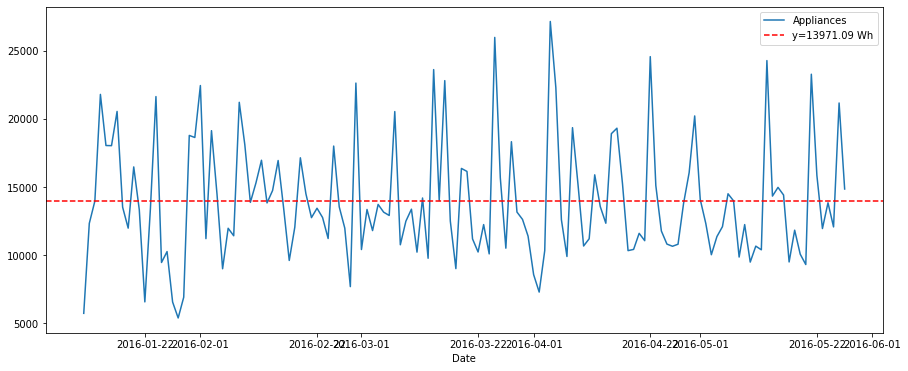

In [258]:
# Plotting daily usage of Energy with daily mean usage of energy
fig, ax= plt.subplots(figsize=(15,6))

eday_usage=df.groupby(["Date"]).Appliances.sum()
eday_usage.plot(kind="line",ax=ax)
plt.axhline(y=eday_usage.mean(), label=f"y={round(eday_usage.mean(),2)} Wh",color="red", linestyle="--")
plt.legend()

<b><u> Analysing usage of Energy on the basis of weekday

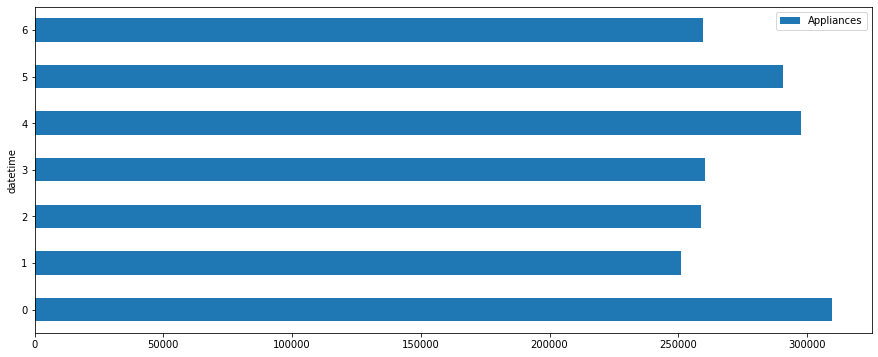

In [259]:
# Plotting usage of Energy grouping every weekday 
fig, ax= plt.subplots(figsize=(15,6))

weekday_usage=df.groupby(df["datetime"].dt.weekday).Appliances.sum()
weekday_usage.plot(kind="barh",ax=ax)
plt.legend()

<b><u> Analysing energy usage on the basis of time of the day

Maximum energy usage recorded at time 18:50:00


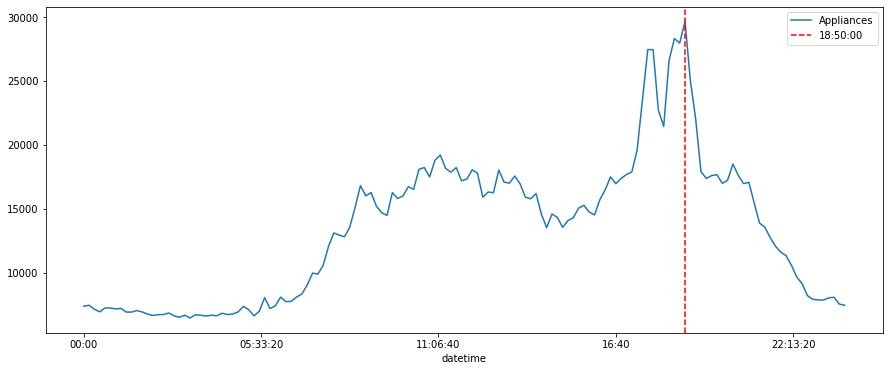

In [260]:
# Plotting usage of Energy grouping time of the day 
fig, ax= plt.subplots(figsize=(15,6))

twise_usage=df.groupby(df["datetime"].dt.time).Appliances.sum()
max_tusage=twise_usage.argmax()
twise_usage.plot(kind="line",ax=ax)

# twise_usage.index[max_tusage]
plt.axvline(x=twise_usage.index[max_tusage], label=f"{twise_usage.index[max_tusage]}",color="red", linestyle="--")
plt.legend();
print(f"Maximum energy usage recorded at time {twise_usage.index[max_tusage]}")

In [261]:
df.isnull().sum();

In [262]:
df["Appliances"].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


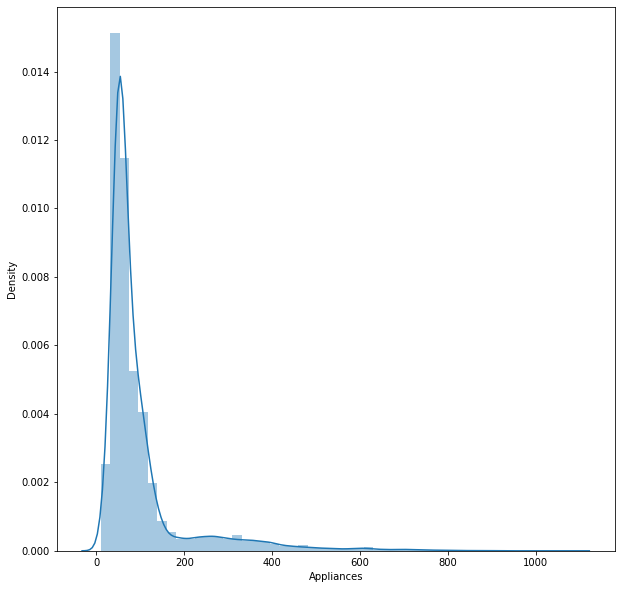

In [263]:
sns.distplot(df["Appliances"])

In [264]:
temp_col=[x for x in col if "T" in x]
df[temp_col].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665,3.760707
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409,4.194648
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000,-6.600000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667,0.900000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667,3.433333
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333,6.566667
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000,15.500000


Temperature range for <b>T1</b>: 16.79 - 26.2 degree celsius

whereas Temp Ranges of <b>T6</b> is more extreme: -6.06 - 28.29 degree Celsius

Since T6 is out of the building and the range is similar for <b>T_out<b>

In [265]:
rhum_col=[x for x in col if "RH" in x]
df[rhum_col].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


Relative Humidity of Bathroom <b>RH_5 </b> has higher maximum (at level of <b>RH_6</b> and <b>RH_out</b>) since humidity will get higher due to water usage and its evaporation.

Normally, inside other rooms, Relative Humidity lies between 20.46 and 63.36 %

In [266]:
col=list(df.columns)
target="Appliances"
# feat_col=col.remove(["Date"])
# col=[x for x in col if x not in ["Date","Time","rv1","rv2", target]]
# col

In [267]:
col.remove("datetime")

<b><u> Plotting histograms of all columns to analyse distribution

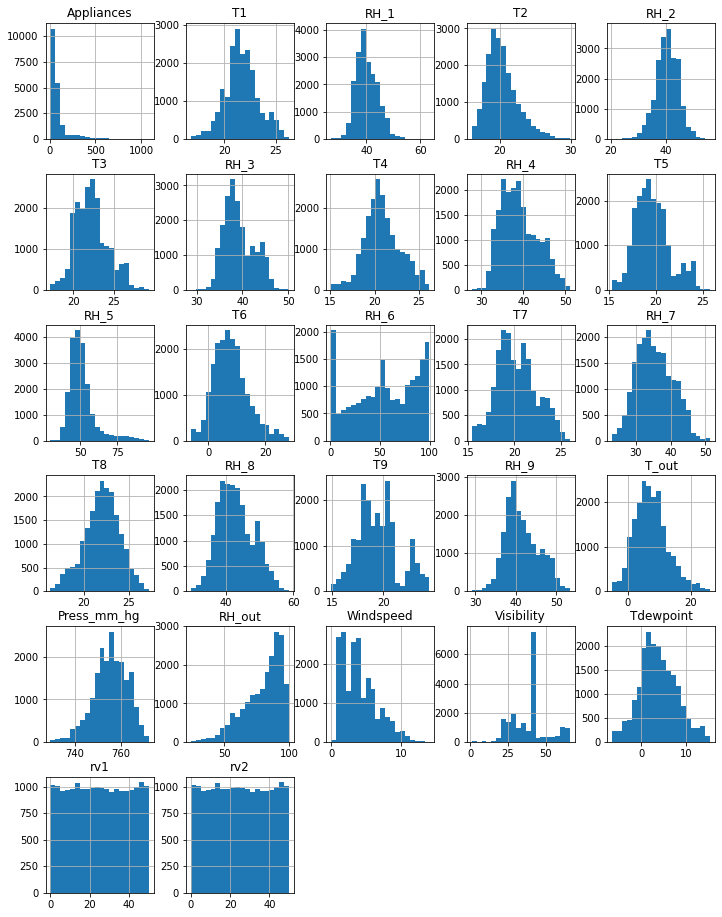

In [268]:

# for i in col:
#   plt.scatter(df[i], df["Appliances"])
#   plt.xlabel(i)
#   plt.ylabel("Appliance (Wh)")
#   plt.show()

df[col].hist(bins = 20 , figsize= (12,16));

Most variables have Normal Distribution except for <b> Appliances, RH_6, Windspeed, Visibility

In [269]:
Tcorr_map=df[temp_col+["Appliances"]].corr()

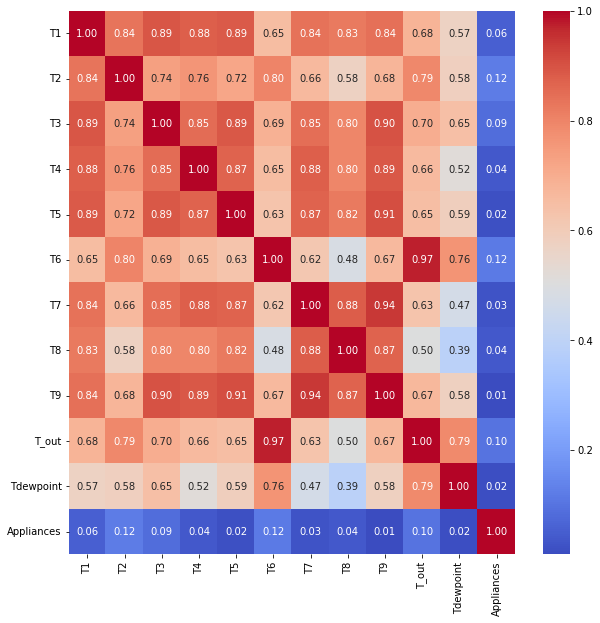

In [270]:
plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(Tcorr_map,annot=True, fmt=".2f", cmap="coolwarm");

Temperatures are highly correlated with each other

In [271]:
# df.drop(columns=["T_out"], inplace= True)

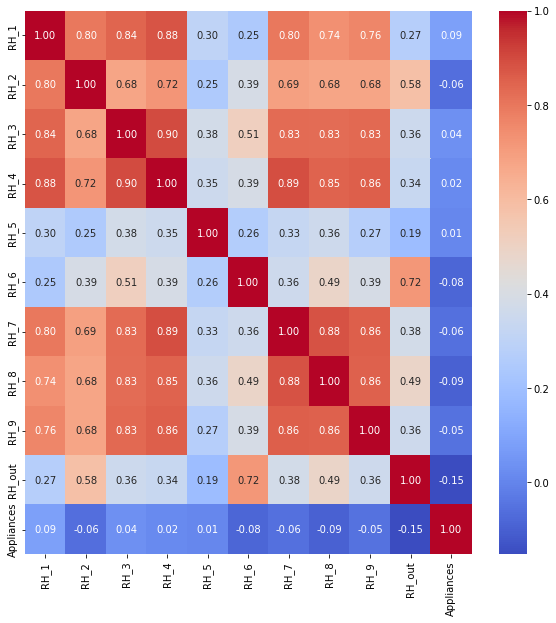

In [272]:
RHcorr_map=df[rhum_col+["Appliances"]].corr()
plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(RHcorr_map,annot=True, fmt=".2f", cmap="coolwarm");

Relative Humidites are also highly correlated with each other, except for RH_6, which is highly correlated with RH_out

RH_5 is not correlated with any variable

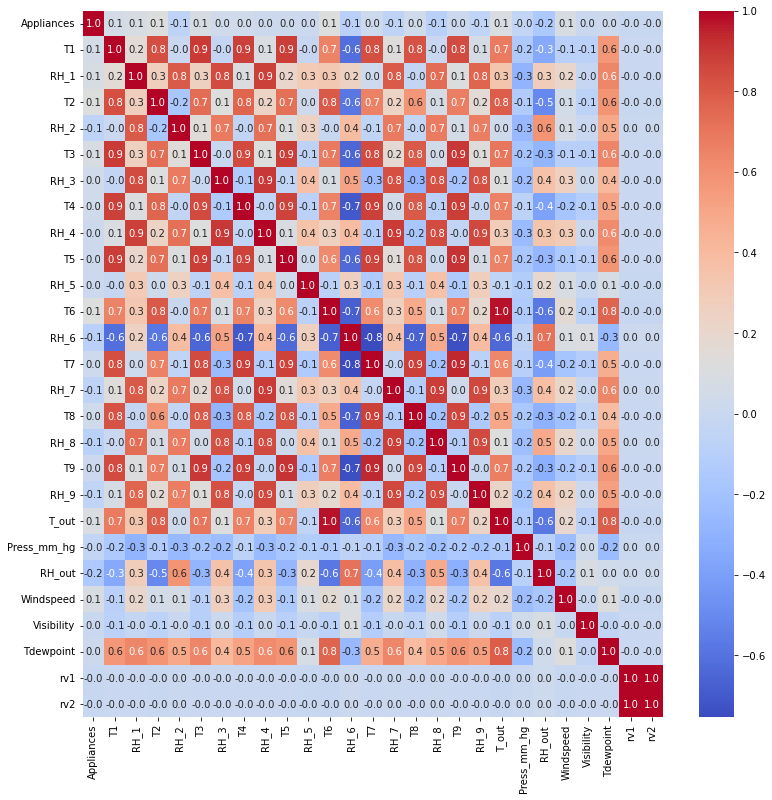

In [279]:
corr_map=df.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".1f", cmap="coolwarm");